# Aprendizaje supervisado - Árboles de decisión

## Carga del conjunto de datos

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
url = 'https://raw.githubusercontent.com/JASDataCTG/Diplomado-ML/main/Modulo%203/Datasets/Movie_classificationesclas.csv'
df = pd.read_csv(url, header = 0)

In [76]:
df.head()

,Costo de marketing,Costo de produccion,Multiplex cubiertos,Ganancias,Duracion,Rating actor principal,Rating actriz principal,Rating director,Rating productor,Rating criticos,Visualizaciones trailers,Disponibilidad 3D,Tiempo realizacion,Hashtags Twitter,Genero,Promedio edad actores,Numero multiplex,Coleccion,Gana Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Costo de marketing        506 non-null    float64
 1   Costo de produccion       506 non-null    float64
 2   Multiplex cubiertos       506 non-null    float64
 3   Ganancias                 506 non-null    float64
 4   Duracion                  506 non-null    float64
 5   Rating actor principal    506 non-null    float64
 6   Rating actriz principal   506 non-null    float64
 7   Rating director           506 non-null    float64
 8   Rating productor          506 non-null    float64
 9   Rating criticos           506 non-null    float64
 10  Visualizaciones trailers  506 non-null    int64  
 11  Disponibilidad 3D         506 non-null    object 
 12  Tiempo realizacion        494 non-null    float64
 13  Hashtags Twitter          506 non-null    float64
 14  Genero    

### Imputación de valores faltantes

In [78]:
df['Tiempo realizacion'].mean()

157.3914979757085

In [79]:
df['Tiempo realizacion'].fillna(value = df['Tiempo realizacion'].mean(), inplace = True)

In [80]:
df.head()

,Costo de marketing,Costo de produccion,Multiplex cubiertos,Ganancias,Duracion,Rating actor principal,Rating actriz principal,Rating director,Rating productor,Rating criticos,Visualizaciones trailers,Disponibilidad 3D,Tiempo realizacion,Hashtags Twitter,Genero,Promedio edad actores,Numero multiplex,Coleccion,Gana Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Costo de marketing        506 non-null    float64
 1   Costo de produccion       506 non-null    float64
 2   Multiplex cubiertos       506 non-null    float64
 3   Ganancias                 506 non-null    float64
 4   Duracion                  506 non-null    float64
 5   Rating actor principal    506 non-null    float64
 6   Rating actriz principal   506 non-null    float64
 7   Rating director           506 non-null    float64
 8   Rating productor          506 non-null    float64
 9   Rating criticos           506 non-null    float64
 10  Visualizaciones trailers  506 non-null    int64  
 11  Disponibilidad 3D         506 non-null    object 
 12  Tiempo realizacion        506 non-null    float64
 13  Hashtags Twitter          506 non-null    float64
 14  Genero    

### Creación de variables dummy

In [82]:
list(dict.fromkeys(df['Genero']))

['Thriller', 'Drama', 'Comedy', 'Action']

In [83]:
df = pd.get_dummies(df, columns = ['Disponibilidad 3D', 'Genero'], drop_first = True)

In [84]:
df.head()

,Costo de marketing,Costo de produccion,Multiplex cubiertos,Ganancias,Duracion,Rating actor principal,Rating actriz principal,Rating director,Rating productor,Rating criticos,...,Tiempo realizacion,Hashtags Twitter,Promedio edad actores,Numero multiplex,Coleccion,Gana Oscar,Disponibilidad 3D_YES,Genero_Comedy,Genero_Drama,Genero_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


### División de la variable predicha y el vector de características

In [85]:
X = df.loc[:, df.columns!= 'Gana Oscar']

In [86]:
X.head()

,Costo de marketing,Costo de produccion,Multiplex cubiertos,Ganancias,Duracion,Rating actor principal,Rating actriz principal,Rating director,Rating productor,Rating criticos,Visualizaciones trailers,Tiempo realizacion,Hashtags Twitter,Promedio edad actores,Numero multiplex,Coleccion,Disponibilidad 3D_YES,Genero_Comedy,Genero_Drama,Genero_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


In [87]:
X.shape

(506, 20)

In [88]:
y = df['Gana Oscar']
type(y)

pandas.core.series.Series

In [89]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Gana Oscar, dtype: int64

In [90]:
y.shape

(506,)

### Creación del conjunto de entrenamiento y validación

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [93]:
X_train.head()

,Costo de marketing,Costo de produccion,Multiplex cubiertos,Ganancias,Duracion,Rating actor principal,Rating actriz principal,Rating director,Rating productor,Rating criticos,Visualizaciones trailers,Tiempo realizacion,Hashtags Twitter,Promedio edad actores,Numero multiplex,Coleccion,Disponibilidad 3D_YES,Genero_Comedy,Genero_Drama,Genero_Thriller
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,8.52,480270,174.68,224.272,23,536,53400,0,0,0,1
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,8.16,491978,200.68,263.472,46,400,43400,0,0,0,0
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,8.68,470107,204.80,224.320,24,387,54000,1,1,0,0
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,41,522,45800,1,0,0,1
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,6.96,302776,172.16,301.664,60,589,20800,1,0,0,0


In [94]:
X_train.shape

(404, 20)

In [95]:
X_test.shape

(102, 20)

### Entrenamiento del árbol de regresión

In [96]:
from sklearn import tree

In [117]:
arbolclas = tree.DecisionTreeClassifier(max_depth = 3)

In [118]:
arbolclas.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

### Predicción en el conjunto de entrenamiento y validación

In [119]:
y_train_pred = arbolclas.predict(X_train)
y_test_pred = arbolclas.predict(X_test)

In [120]:
y_test_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

### Métricas del modelo

In [121]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from mlxtend.plotting import plot_confusion_matrix

In [122]:
confusion_matrix(y_test, y_test_pred)

array([[39,  5],
       [41, 17]], dtype=int64)

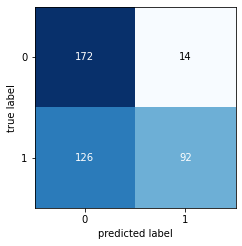

In [123]:
plot_confusion_matrix(conf_mat = confusion_matrix(y_train, y_train_pred), figsize=(6,6), show_normed=False)
plt.tight_layout(pad = 10)

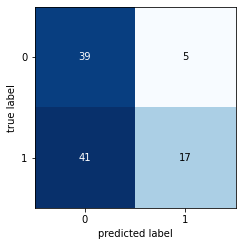

In [124]:
plot_confusion_matrix(conf_mat = confusion_matrix(y_test, y_test_pred), figsize=(6,6), show_normed=False)
plt.tight_layout(pad = 10)

In [125]:
accuracy_score(y_test, y_test_pred)

0.5490196078431373

In [126]:
roc_auc_score(y_test, y_test_pred)

0.5897335423197492

### Gráficar árbol de regresión

In [127]:
datos_graf = tree.export_graphviz(arbolclas, out_file = None, feature_names = X_train.columns, filled = True)

In [128]:
from IPython.display import Image

In [129]:
import pydotplus

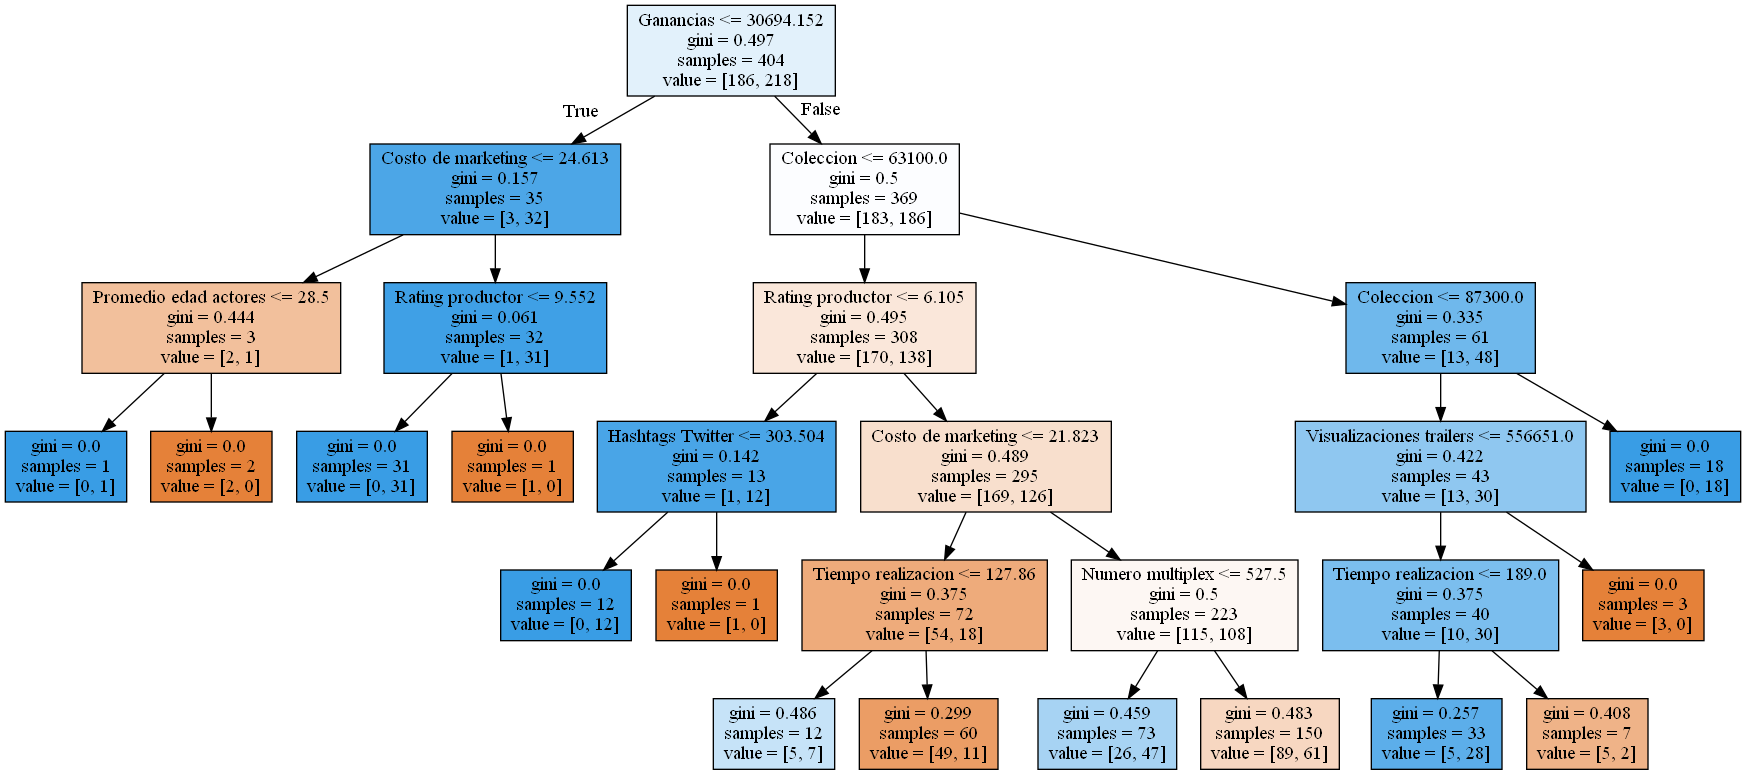

In [116]:
graph = pydotplus.graph_from_dot_data(datos_graf)
Image(graph.create_png())
#graph.write_png('arboloriginalclass.png') # Si se desea guardar el árbol

### Controlando el crecimiento del árbol

#### Por el máximo nivel de crecimiento del árbol

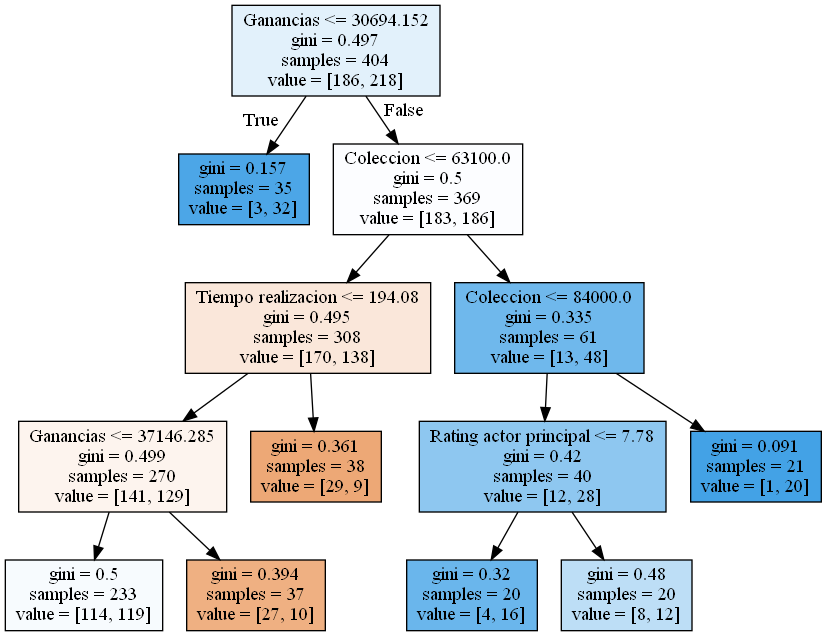

In [131]:
arbolclas1 = tree.DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 20, min_samples_split = 15)
arbolclas1.fit(X_train, y_train)
datos_graf = tree.export_graphviz(arbolclas1, out_file = None, feature_names = X_train.columns, filled = True)
graph1 = pydotplus.graph_from_dot_data(datos_graf)
Image(graph1.create_png())